<a href="https://colab.research.google.com/github/IngerMasha/Hackathon3/blob/main/EnhancingCustomerExperienceandBoostingSalesinOnlineRetail.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install ucimlrepo

In [19]:
from ucimlrepo import fetch_ucirepo

# fetch dataset
online_retail = fetch_ucirepo(id=352)

# data (as pandas dataframes)
X = online_retail.data.features
y = online_retail.data.targets

# metadata
print(online_retail.metadata)

# variable information
print(online_retail.variables)


KeyboardInterrupt: 

In [18]:
import pandas as pd

data = pd.concat([X, y], axis=1)

# Просмотр первых строк данных
print(data.head())

# Проверка наличия пропущенных значений
print(data.isnull().sum())

# Общая информация о наборе данных
print(data.info())

# # Убедимся, что все нужные столбцы имеют числовой тип
# data['Recency'] = pd.to_numeric(data['Recency'], errors='coerce')
# data['Frequency'] = pd.to_numeric(data['Frequency'], errors='coerce')
# data['Monetary'] = pd.to_numeric(data['Monetary'], errors='coerce')
# # data['AvgMonetary'] = pd.to_numeric(data['AvgMonetary'], errors='coerce')

# # Удаление строк с отрицательными значениями в столбце 'Monetary'
# data_cleaned = data[data['Monetary'] >= 0]

# # Проверка данных после удаления строк с отрицательными значениями
# print(f"Количество строк после удаления отрицательных значений: {data_cleaned.shape[0]}")
# print(data_cleaned.head())

   Recency  Frequency   Monetary
0        0       0.00   0.000000
1      365    4310.00  23.681319
2      282    1797.24  57.975484
3        0    1757.55  24.076027
4        0     334.40  19.670588
Recency      0
Frequency    0
Monetary     0
dtype: int64
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4372 entries, 0 to 4371
Data columns (total 3 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    4372 non-null   int64  
 1   Frequency  4372 non-null   float64
 2   Monetary   4372 non-null   float64
dtypes: float64(2), int64(1)
memory usage: 102.6 KB
None


KeyError: 'AvgMonetary'

In [14]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


# Группировка данных по CustomerID и расчет метрик
customer_segmentation = data.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (x.max() - x.min()).days,
    'TotalPrice': ['sum', 'mean', 'count']
}).reset_index()

# Переименование столбцов для удобства
customer_segmentation.columns = ['CustomerID', 'Recency', 'Frequency', 'Monetary', 'AvgMonetary']

# Просмотр первых строк таблицы с сегментацией
print(customer_segmentation.head())

# Описание данных (для понимания распределения метрик)
print(customer_segmentation.describe())

KeyError: 'Quantity'

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


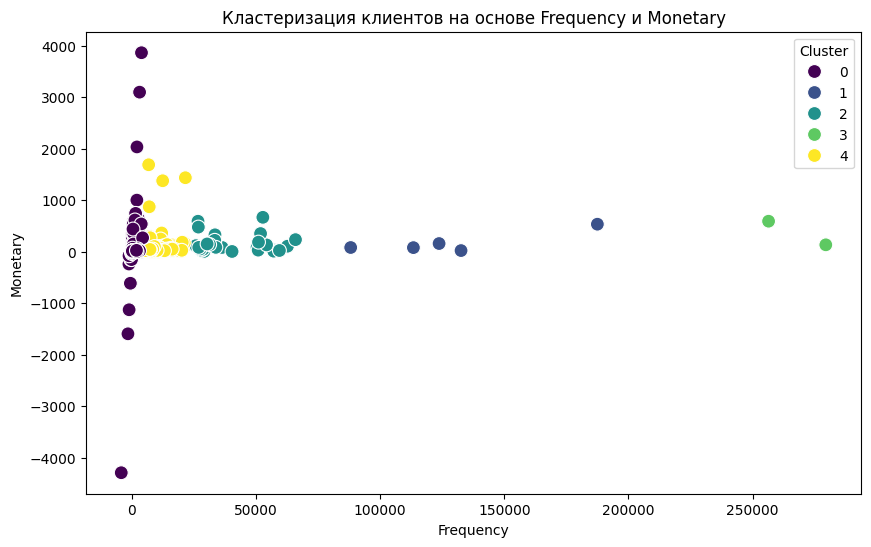

[[1.20187577e+02 9.48451054e+02 2.53544182e+01]
 [3.55200000e+02 1.29057952e+05 1.75474958e+02]
 [3.45259259e+02 4.09287948e+04 1.65861186e+02]
 [3.59500000e+02 2.67963755e+05 3.63142095e+02]
 [3.08762264e+02 8.11596204e+03 6.31460749e+01]]


In [8]:
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Подготовка данных для кластеризации (используем только метрики Recency, Frequency и Monetary)
X = customer_segmentation[['Recency', 'Frequency', 'Monetary']]

# Инициализация и обучение модели K-Means
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segmentation['Cluster'] = kmeans.fit_predict(X)

# Визуализация результатов кластеризации
plt.figure(figsize=(10, 6))
sns.scatterplot(data=customer_segmentation, x='Frequency', y='Monetary', hue='Cluster', palette='viridis', s=100)
plt.title('Кластеризация клиентов на основе Frequency и Monetary')
plt.show()

# Вывод центроидов кластеров
print(kmeans.cluster_centers_)


Пояснение графика:
Ось X (Frequency): Показывает, как часто клиенты совершают покупки.
Ось Y (Monetary): Показывает сумму, которую клиенты тратят.
Интерпретация:
Кластеры:

Фиолетовый кластер (0): Включает клиентов с низкой частотой покупок (почти все на уровне 0) и даже с отрицательной или низкой монетарной стоимостью. Это может означать, что эти клиенты либо недавно вернули товары, либо сделали очень мало покупок.
Желтый кластер (4): Клиенты с низкой частотой покупок, но с положительной монетарной стоимостью, что указывает на небольшие, но регулярные покупки.
Зеленый и синий кластеры (1 и 3): Клиенты с более высокой частотой покупок и положительной монетарной стоимостью. Синий кластер представляет клиентов с наиболее частыми покупками и высокой монетарной стоимостью.
Бирюзовый кластер (2): Клиенты с промежуточной частотой покупок и монетарной стоимостью.
Разброс точек:

Кластеризация явно выявила группы клиентов, которые сильно различаются по частоте покупок и тратам. Некоторые клиенты (особенно в зеленом и синем кластерах) совершают большое количество покупок с высокими расходами, в то время как другие клиенты делают покупки редко или вообще не совершают покупок.
Что можно вынести:
Клиенты в фиолетовом кластере требуют особого внимания, так как они либо делают мало покупок, либо имеют отрицательную монетарную стоимость, что может быть связано с возвратами.
Зеленый и синий кластеры включают наиболее ценных клиентов, на которых можно сфокусироваться для поддержания лояльности и увеличения продаж.
Желтый кластер также интересен, так как эти клиенты тратят деньги, но делают это нерегулярно.

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:1416: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  super()._check_params_vs_input(X, default_n_init=10)


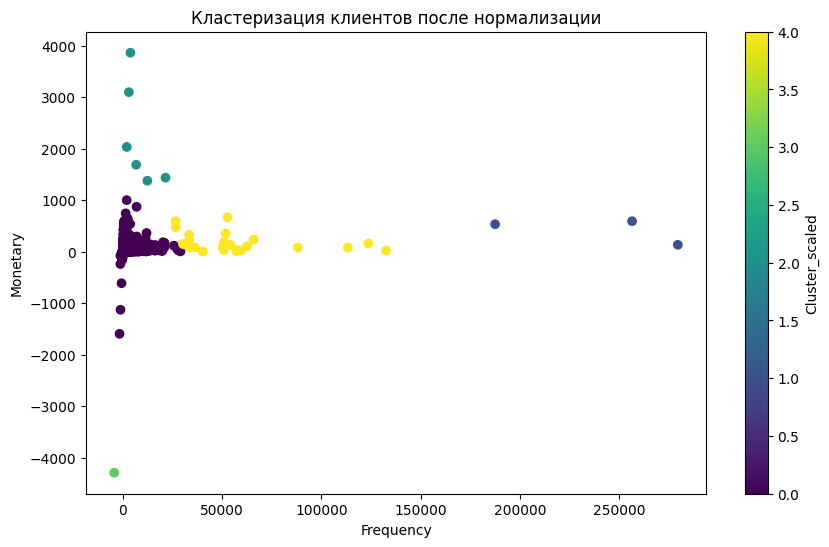

In [10]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Нормализация данных
scaler = StandardScaler()
scaled_data = scaler.fit_transform(customer_segmentation[['Frequency', 'Monetary']])

# Повторная кластеризация
kmeans = KMeans(n_clusters=5, random_state=42)
customer_segmentation['Cluster_scaled'] = kmeans.fit_predict(scaled_data)

# Визуализация результатов после нормализации
plt.figure(figsize=(10, 6))
plt.scatter(customer_segmentation['Frequency'], customer_segmentation['Monetary'], c=customer_segmentation['Cluster_scaled'], cmap='viridis')
plt.xlabel('Frequency')
plt.ylabel('Monetary')
plt.title('Кластеризация клиентов после нормализации')
plt.colorbar(label='Cluster_scaled')
plt.show()
